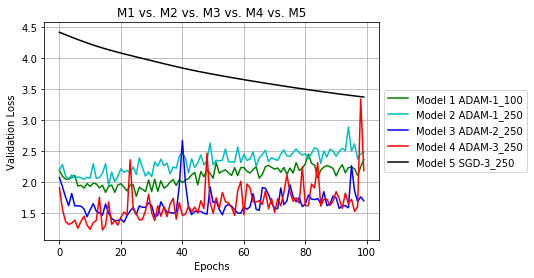

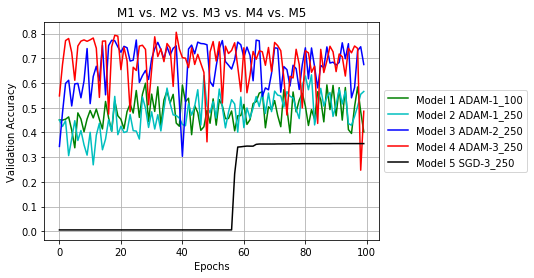

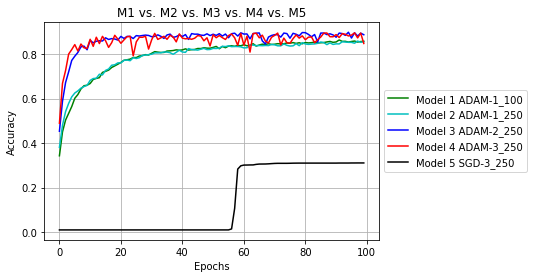

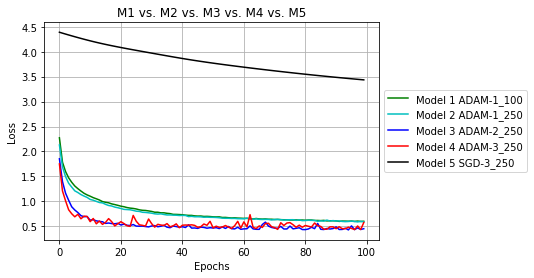

In [32]:
import numpy as np
import pandas as pd
import math
from keras.utils.np_utils import to_categorical
import keras
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.optimizers import SGD

data = pd.read_csv('user3_gps_DataFrame.csv')
df = pd.DataFrame(data)# Main Data Frame

#Training Predictors Data Frame
Train = df[['latitude','longitude','Mon','Tue','Wed','Thu','Fri','Sat','Sun','P1','P2','P3','P4','P5','P6','P7','P8','LocID']]



#Creating Targets

#Training Targets Data Frame
Train_Target = df[['Next']]
train_t = Train_Target.as_matrix().astype(int)

#Creating a dictionary with unique Location Ids
#This method is to reduce inconsistency in the One Hot Encoding
targets = np.unique(train_t)
target_dict = dict((j,i) for i,j in enumerate(targets))

#Creating new consistent sequenced Location IDs (Cluster IDs)
training_target = []
for i in range(9999):
    training_target.append((target_dict[train_t[i][0]]))

# One Hot Encoding Training Targets
training_targets = to_categorical(training_target)



#Creating Predictor Feature Set

train_predictors = Train.as_matrix()
LocID = []
for i in range(9999):
    LocID.append(train_predictors[i,17])
LocID = map(int, LocID)
LocationID = []
# Removing inconsistent targets with sequenced target IDS
for i in range(9999):
    LocationID.append((target_dict[LocID[i]]))
LocationID = np.array([LocationID])
train_predictors_updated = np.delete(train_predictors, 17, 1)
# Predictors feature set to train the Neural Network
predictors = np.concatenate((train_predictors_updated, LocationID.T), axis=1)



# Model 1; HL=1; Nodes=100; Optimizer=ADAM 
model_1 = Sequential()
model_1.add(Dense(100, activation='tanh', input_shape=(train_predictors.shape[1],)))
model_1.add(Dense(61, activation='softmax'))
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_1_training = model_1.fit(predictors, training_targets, epochs=100, validation_split=0.3, verbose=False)


# Model 2; HL=1; Nodes=250; Optimizer=ADAM 
model_2 = Sequential()
model_2.add(Dense(250, activation='tanh', input_shape=(train_predictors.shape[1],)))
model_2.add(Dense(61, activation='softmax'))
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2_training = model_2.fit(predictors, training_targets, epochs=100, validation_split=0.3, verbose=False)


# Model 3; HL=2; Nodes=250; Optimizer=ADAM 
model_3 = Sequential()
model_3.add(Dense(250, activation='tanh', input_shape=(train_predictors.shape[1],)))
model_3.add(Dense(250, activation='tanh'))
model_3.add(Dense(61, activation='softmax'))
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_3_training = model_3.fit(predictors, training_targets, epochs=100, validation_split=0.3, verbose=False)
            
            
# Model 4; HL=3; Nodes=250; Optimizer=ADAM            
model_4 = Sequential()
model_4.add(Dense(250, activation='tanh', input_shape=(train_predictors.shape[1],)))
model_4.add(Dense(250, activation='tanh'))
model_4.add(Dense(250, activation='tanh'))
model_4.add(Dense(61, activation='softmax'))
model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_4_training = model_4.fit(predictors, training_targets, epochs=100, validation_split=0.3, verbose=False)


# Model 5; HL=3; Nodes=250; Optimizer=SGD   
learning_rate = 0.000001
model_5 = Sequential()
model_5.add(Dense(250, activation='tanh', input_shape=(train_predictors.shape[1],)))
model_5.add(Dense(250, activation='tanh'))
model_5.add(Dense(250, activation='tanh'))
model_5.add(Dense(61, activation='softmax'))
stochastic_opt = SGD(lr=learning_rate)
model_5.compile(optimizer=stochastic_opt, loss='categorical_crossentropy', metrics=['accuracy'])
model_5_training = model_5.fit(predictors, training_targets, epochs=100, validation_split=0.3, verbose=False)    
            

    
    
    
# Plotting all 4 Model's Validation Loss
plt.plot(model_1_training.history['val_loss'], 'g', label='Model 1 ADAM-1_100')
plt.plot(model_2_training.history['val_loss'], 'c', label='Model 2 ADAM-1_250')
plt.plot(model_3_training.history['val_loss'], 'b', label='Model 3 ADAM-2_250')
plt.plot(model_4_training.history['val_loss'], 'r', label='Model 4 ADAM-3_250')
plt.plot(model_5_training.history['val_loss'], 'k', label='Model 5 SGD-3_250')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('M1 vs. M2 vs. M3 vs. M4 vs. M5')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.grid(True)
plt.show()


# Plotting all 5 Model's Validation Accuracy
plt.plot(model_1_training.history['val_acc'], 'g', label='Model 1 ADAM-1_100')
plt.plot(model_2_training.history['val_acc'], 'c', label='Model 2 ADAM-1_250')
plt.plot(model_3_training.history['val_acc'], 'b', label='Model 3 ADAM-2_250')
plt.plot(model_4_training.history['val_acc'], 'r', label='Model 4 ADAM-3_250')
plt.plot(model_5_training.history['val_acc'], 'k', label='Model 5 SGD-3_250')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('M1 vs. M2 vs. M3 vs. M4 vs. M5')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()



# Plotting all 4 Model's Accuracy
plt.plot(model_1_training.history['acc'], 'g', label='Model 1 ADAM-1_100')
plt.plot(model_2_training.history['acc'], 'c', label='Model 2 ADAM-1_250')
plt.plot(model_3_training.history['acc'], 'b', label='Model 3 ADAM-2_250')
plt.plot(model_4_training.history['acc'], 'r', label='Model 4 ADAM-3_250')
plt.plot(model_5_training.history['acc'], 'k', label='Model 5 SGD-3_250')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('M1 vs. M2 vs. M3 vs. M4 vs. M5')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()



# Plotting all 4 Model's Loss
plt.plot(model_1_training.history['loss'], 'g', label='Model 1 ADAM-1_100')
plt.plot(model_2_training.history['loss'], 'c', label='Model 2 ADAM-1_250')
plt.plot(model_3_training.history['loss'], 'b', label='Model 3 ADAM-2_250')
plt.plot(model_4_training.history['loss'], 'r', label='Model 4 ADAM-3_250')
plt.plot(model_5_training.history['loss'], 'k', label='Model 5 SGD-3_250')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('M1 vs. M2 vs. M3 vs. M4 vs. M5')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()